In [3]:
import pandas as pd # 引用套件並縮寫為 pd  
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
pd.set_option('display.width',1000)
df = pd.read_csv('/Users/xwlee/Desktop/ECt/hw8/income.csv') 

ModuleNotFoundError: No module named 'pandas'

In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['workclass'] = labelencoder.fit_transform(df['workclass'])
df['education'] = labelencoder.fit_transform(df['workclass'])
df['marital-status'] = labelencoder.fit_transform(df['workclass'])
df['occupation'] = labelencoder.fit_transform(df['workclass'])
df['relationship'] = labelencoder.fit_transform(df['workclass'])
df['race'] = labelencoder.fit_transform(df['workclass'])
df['gender'] = labelencoder.fit_transform(df['workclass'])
df['native-country'] = labelencoder.fit_transform(df['workclass'])

ModuleNotFoundError: No module named 'sklearn'

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
x=df[['age','workclass','fnlwgt','education','educational-num','marital-status','occupation','relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country']]
y=df[['income']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=15)
knn = KNeighborsClassifier()
knn.fit(x_train,y_train.values.ravel())
y_test_predicted = knn.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_test_predicted)
print(accuracy)

ModuleNotFoundError: No module named 'sklearn'

In [22]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
a=[]
for i in range(14):
    forward = SFS(knn, 
              k_features = i+1, 
              forward = True, 
              floating = False, 
              verbose = 0,
              scoring = 'accuracy',
              cv=5)
    forward = forward.fit(x_train, y_train.values.ravel())
    a.append(forward.k_score_)
    print("n=",i+1,f"Best score achieved: {forward.k_score_}, Feature's names: {forward.k_feature_names_}")      

n= 1 Best score achieved: 0.6658819365115118, Feature's names: ('educational-num',)
n= 2 Best score achieved: 0.698117334105621, Feature's names: ('educational-num', 'capital-gain')
n= 3 Best score achieved: 0.7301902294874477, Feature's names: ('age', 'educational-num', 'capital-gain')
n= 4 Best score achieved: 0.738101137515486, Feature's names: ('age', 'educational-num', 'capital-gain', 'capital-loss')
n= 5 Best score achieved: 0.7473293324537834, Feature's names: ('age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week')
n= 6 Best score achieved: 0.7474764961734215, Feature's names: ('age', 'workclass', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week')
n= 7 Best score achieved: 0.7452789084999919, Feature's names: ('age', 'workclass', 'education', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week')
n= 8 Best score achieved: 0.7436676159370157, Feature's names: ('age', 'workclass', 'education', 'educational-num', 'marital-status'

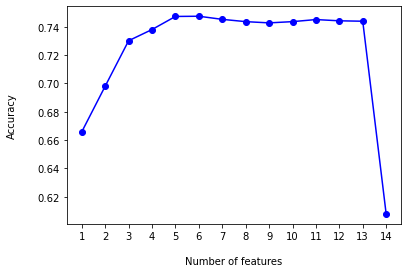

In [23]:
b = np.linspace(1,14,14)
plt.plot(b,a,'o-',color = 'b')
plt.xlabel("Number of features", fontsize=10, labelpad = 15)
plt.ylabel("Accuracy", fontsize=10, labelpad = 20)
plt.xticks(np.arange(min(b), max(b)+1, 1.0))
plt.show()

In [24]:
dict = {"Number of features": b,"Accuracy": a}
df1 = pd.DataFrame(dict)
df1

,Number of features,Accuracy
0,1.0,0.665882
1,2.0,0.698117
2,3.0,0.730190
3,4.0,0.738101
4,5.0,0.747329
5,6.0,0.747476
6,7.0,0.745279
7,8.0,0.743668
8,9.0,0.742789
9,10.0,0.743668


In [28]:
n=df1['Number of features'].loc[df1['Accuracy'].argmax()]
m=int(n.tolist())
forward = SFS(knn, 
              k_features =m, 
              forward = True, 
              floating = False, 
              verbose = 0,
              scoring = 'accuracy',
              cv=5)
forward = forward.fit(x_train, y_train.values.ravel())
a.append(forward.k_score_)
print("When number of feature is",m,f",best score achieved: {forward.k_score_}, Feature's names: {forward.k_feature_names_}")      

When number of feature is 6 ,best score achieved: 0.7474764961734215, Feature's names: ('age', 'workclass', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week')


In [29]:
x1=df[['age','workclass','educational-num','capital-gain','capital-loss','hours-per-week']]
y1=df[['income']]
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=15)
knn = KNeighborsClassifier()
knn.fit(x1_train,y1_train.values.ravel())
y1_test_predicted = knn.predict(x1_test)
accuracy1 = metrics.accuracy_score(y1_test, y1_test_predicted)
print("Before:",accuracy)
print("After:",accuracy1)

Before: 0.6230348598769652
After: 0.7539302802460697
